#NEURAL NETWORK COMPUTER VISION

Convolutional Neural Networks are the most common types of neural networks used for Computer Vision

I/P layer, O/P layer, Convolutional layer, hidden activation, pooling layer, dense layer, O/P activation

##Get the data

Taken from Food101 dataset, modified to have only 2 classes - pizza and steak

In [ ]:
import tensorflow as tf
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzio the file
zip_ref =zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-06-16 15:00:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.250.4.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  24.2MB/s    in 5.6s    

2023-06-16 15:00:32 (18.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



####Inspecting the data

In [ ]:
!ls pizza_steak # ls means list the files in pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'{len(dirnames)} directories and {len(filenames)} image files in {dirpath}.')

2 directories and 0 image files in pizza_steak.
2 directories and 0 image files in pizza_steak/train.
0 directories and 750 image files in pizza_steak/train/steak.
0 directories and 750 image files in pizza_steak/train/pizza.
2 directories and 0 image files in pizza_steak/test.
0 directories and 250 image files in pizza_steak/test/steak.
0 directories and 250 image files in pizza_steak/test/pizza.


#####Visualizing Images

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  # create list class_names for subdirectiories
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# Visualizing it

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view image from here)
  target_folder = target_dir+target_class

  # Get random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read in the image and plot it using matplolib
  img = mpimg.imread(target_folder +"/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"image shape{img.shape}")

  return img

In [ ]:
img = view_random_image("pizza_steak/train/" , "steak")

In [ ]:
img = view_random_image("pizza_steak/train/" , "steak")

In [ ]:
img = view_random_image("pizza_steak/train/" , "steak")

In [ ]:
img = view_random_image("pizza_steak/train/" , "steak")

In [ ]:
img = view_random_image("pizza_steak/train/" , "steak")

['2135635.jpg']
image shape(512, 512, 3)


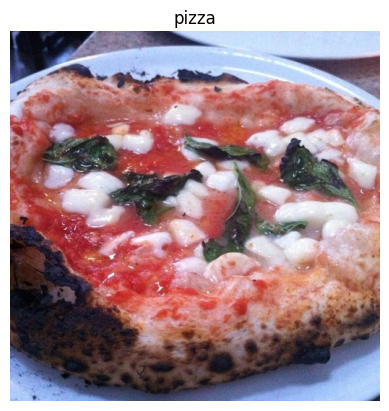

In [ ]:
img = view_random_image("pizza_steak/train/" , "pizza")

['807128.jpg']
image shape(512, 512, 3)


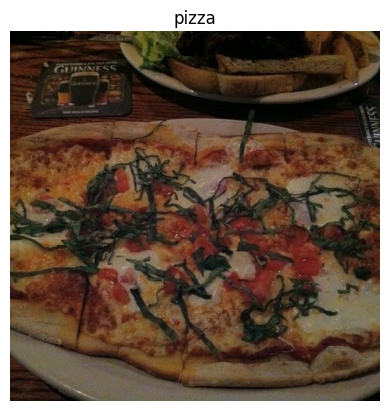

In [ ]:
img = view_random_image("pizza_steak/train/" , "pizza")

['2849924.jpg']
image shape(512, 512, 3)


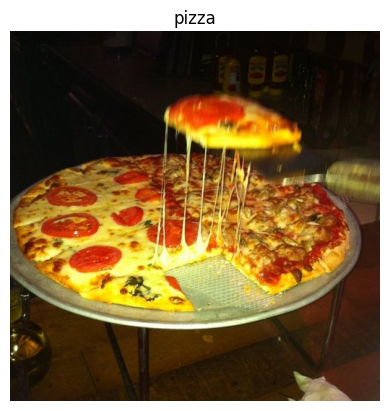

In [ ]:
img = view_random_image("pizza_steak/train/" , "pizza")

['1593835.jpg']
image shape(384, 512, 3)


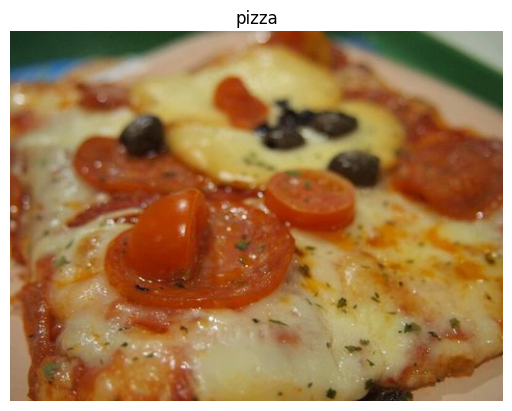

In [ ]:
img = view_random_image("pizza_steak/train/" , "pizza")

['712149.jpg']
image shape(512, 382, 3)


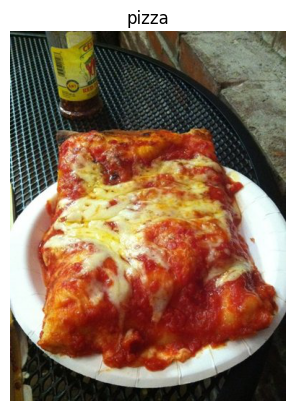

In [ ]:
img = view_random_image("pizza_steak/train/" , "pizza")

Images are of the form (Width, Height, Colour Channels).

We can see that the sizes of the files are different.

We also need to normalize all the images.

##Creating Neural Network Models

###End to End Model

-This will do reshaping, normalization, and learning in one step


We will be doing
- Load images
- preprocess images
- Build CNN
- Compile CNN
- Fit CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed
tf.random.set_seed(42)

# Normalization - setting up two instances of image data generator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setting directory path
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data and get batches

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                            batch_size = 32,
                                            target_size = (224,224),
                                            class_mode = "binary",
                                            seed =42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                            batch_size = 32,
                                            target_size = (224,224),
                                            class_mode = "binary",
                                            seed =42)


# Building CNN (same as tinyVGG on CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile CNN
model_1.compile(loss="binary_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 27s 323ms/step - loss: 0.6484 - accuracy: 0.6307 - val_loss: 0.4507 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 13s 275ms/step - loss: 0.4808 - accuracy: 0.7807 - val_loss: 0.3908 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 11s 233ms/step - loss: 0.4250 - accuracy: 0.8080 - val_loss: 0.4695 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 11s 236ms/step - loss: 0.3622 - accuracy: 0.8547 - val_loss: 0.3530 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 11s 235ms/step - loss: 0.3048 - accuracy: 0.8753 - val_loss: 0.3757 - val_accuracy: 0.8260


**Note**: It's beter to usr GPU

In [ ]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

#### Comparing with other (simple models)

In [ ]:
# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 255ms/step - loss: 2.5062 - accuracy: 0.6353 - val_loss: 0.6914 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 13s 276ms/step - loss: 0.7379 - accuracy: 0.7367 - val_loss: 1.0371 - val_accuracy: 0.6500
Epoch 3/5
47/47 [==============================] - 12s 261ms/step - loss: 0.7933 - accuracy: 0.7380 - val_loss: 0.5020 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 10s 218ms/step - loss: 0.5762 - accuracy: 0.7807 - val_loss: 0.6559 - val_accuracy: 0.7320
Epoch 5/5
47/47 [==============================] - 10s 222ms/step - loss: 0.5081 - accuracy: 0.7867 - val_loss: 0.4796 - val_accuracy: 0.7940


In [ ]:
# Check out the layers in our model
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 100)               15052900  
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


We had to create a Feed Forward Neural network with about 500x parameters of CNN, and we still don't have as good perrformance as that of the CNN. This shows how awesome CNNs are.

####Another CNN model type (without Image Data Generator)

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Set the path to your dataset directory
dataset_path = 'pizza_steak/train/'

# Define the size of the input images
img_size = (224, 224)

# Initialize empty lists for the data and labels
X = []
Y = []

# Loop over each class subdirectory and load the images
for label in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, label)
    for image_filename in os.listdir(class_path):
        image_path = os.path.join(class_path, image_filename)
        # Load the image with OpenCV and resize it to the desired size
        image = cv2.imread(image_path)
        image = cv2.resize(image, img_size)
        # Append the image and label to the lists
        X.append(image)
        Y.append(label)

# Convert the data and labels to numpy arrays
X = np.array(X, dtype = np.float32)
Y = np.array(Y)

from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Fit the encoder on the categorical labels and transform them to numerical labels
Y_encoded = le.fit_transform(Y)

# Print the unique numerical labels
print(np.unique(Y_encoded)), Y_encoded



# Normalize the pixel values of the images to be between 0 and 1
X = X / 255.0

# Define the CNN architecture
model_3 = Sequential([
    Conv2D(32, (3, 3), input_shape=X.shape[1:], activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), input_shape=X.shape[1:], activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), input_shape=X.shape[1:], activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(set(Y)), activation='softmax')
])

# Compile the model with a loss function and optimizer
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the dataset
model_3.fit(X, tf.keras.utils.to_categorical( Y_encoded, num_classes =2, dtype="float32"), epochs=10, batch_size=32, validation_split=0.3)

[0 1]
Epoch 1/10
33/33 [==============================] - 8s 127ms/step - loss: 0.6081 - accuracy: 0.6990 - val_loss: 1.6020 - val_accuracy: 0.0000e+00
Epoch 2/10
33/33 [==============================] - 2s 62ms/step - loss: 0.5670 - accuracy: 0.7143 - val_loss: 1.4253 - val_accuracy: 0.0000e+00
Epoch 3/10
33/33 [==============================] - 2s 62ms/step - loss: 0.4833 - accuracy: 0.7352 - val_loss: 1.1075 - val_accuracy: 0.5911
Epoch 4/10
33/33 [==============================] - 2s 62ms/step - loss: 0.3978 - accuracy: 0.8276 - val_loss: 1.7873 - val_accuracy: 0.1644
Epoch 5/10
33/33 [==============================] - 2s 62ms/step - loss: 0.3899 - accuracy: 0.8457 - val_loss: 0.7320 - val_accuracy: 0.6467
Epoch 6/10
33/33 [==============================] - 2s 65ms/step - loss: 0.3489 - accuracy: 0.8476 - val_loss: 1.4000 - val_accuracy: 0.3911
Epoch 7/10
33/33 [==============================] - 2s 64ms/step - loss: 0.3561 - accuracy: 0.8486 - val_loss: 0.4985 - val_accuracy: 0.806

In [ ]:
model_3.evaluate(X,tf.keras.utils.to_categorical( Y_encoded, num_classes =2, dtype="float32"))

47/47 [==============================] - 2s 34ms/step - loss: 0.3900 - accuracy: 0.8420


[0.3899698555469513, 0.8420000076293945]

Here we can see another CNN model with different type of data

###Binary classification: Let's break it down

We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

####Step 1 - 4   (BASELINE MODEL)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed
tf.random.set_seed(42)

# Normalization - setting up two instances of image data generator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setting directory path
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data and get batches

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                            batch_size = 32,
                                            target_size = (224,224),
                                            class_mode = "binary",
                                            seed =42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                            batch_size = 32,
                                            target_size = (224,224),
                                            class_mode = "binary",
                                            seed =42)


# Building CNN (same as tinyVGG on CNN explainer website)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile CNN
model.compile(loss="binary_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

# Fit the model
history = model.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 242ms/step - loss: 0.6015 - accuracy: 0.6933 - val_loss: 0.4565 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 11s 232ms/step - loss: 0.4541 - accuracy: 0.7927 - val_loss: 0.3556 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4257 - accuracy: 0.8233 - val_loss: 0.3508 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 11s 226ms/step - loss: 0.3676 - accuracy: 0.8473 - val_loss: 0.3335 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3247 - accuracy: 0.8727 - val_loss: 0.3075 - val_accuracy: 0.8640


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.ylim([0,1])
  plt.legend()
  plt.grid(True)

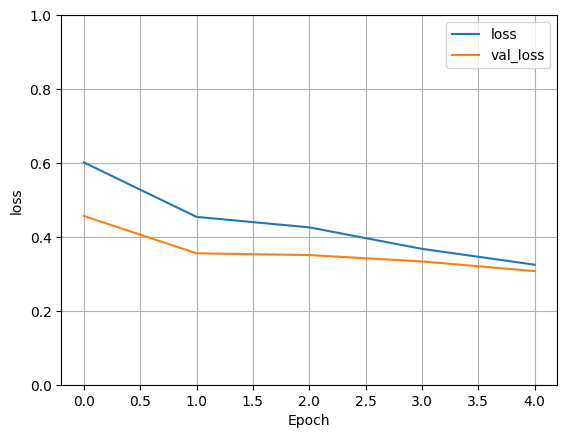

In [ ]:
plot_loss(history)

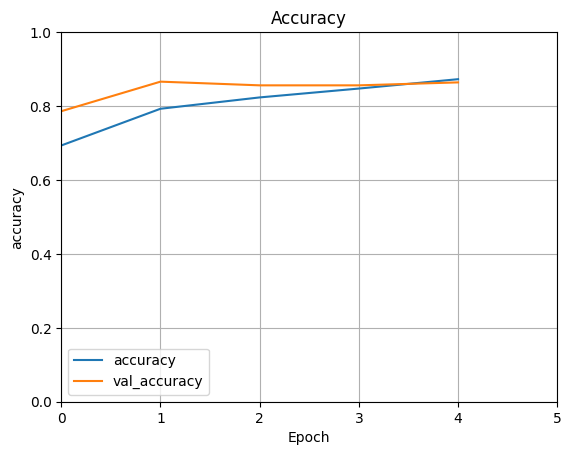

In [ ]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.ylim([0,1])
  plt.xlim([0,len(history.history['accuracy'])])
  plt.title('Accuracy')
  plt.legend()
  plt.grid(True)

plot_accuracy(history)

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

####Step 5

####Evaluating the baseline model

#####Plotting the training curves

<Axes: title={'center': 'Evaluation'}>

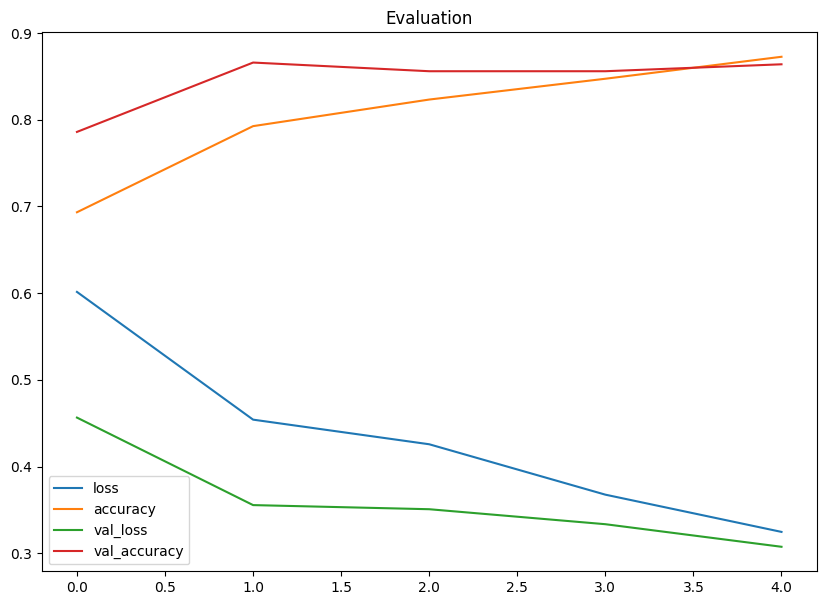

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10,7), title="Evaluation")

When a model's validation loss starts to increase, it generally means that the model is overfitting the training dataset.

####Step 6

#####Adjusting the parameters

The process is like ->create baseline model->overfit the model to get higher performance->reduce overfitting

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
# Will add maxpooling layer after every convolution layer
from tensorflow.keras.layers import MaxPooling2D as MaxPool2D
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 266ms/step - loss: 0.6090 - accuracy: 0.6720 - val_loss: 0.4743 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 10s 224ms/step - loss: 0.4641 - accuracy: 0.7853 - val_loss: 0.3899 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 13s 274ms/step - loss: 0.4200 - accuracy: 0.8180 - val_loss: 0.3729 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.4225 - accuracy: 0.8060 - val_loss: 0.3390 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 10s 216ms/step - loss: 0.3809 - accuracy: 0.8407 - val_loss: 0.3149 - val_accuracy: 0.8760


In [ ]:
model_5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 26, 26, 10)      

<Axes: >

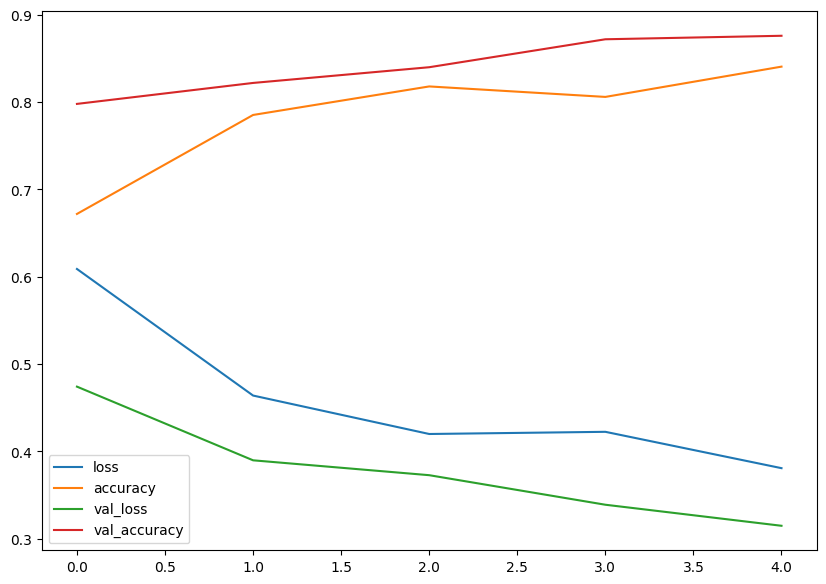

In [ ]:
pd.DataFrame(history_5.history).plot(figsize = (10,7))

The improved model has higher accuracy, and it uses less memory as it has 1/4th the parameters of the baseline model.

In [ ]:
model_5.evaluate(valid_data), model.evaluate(valid_data)

16/16 [==============================] - 3s 206ms/step - loss: 0.3075 - accuracy: 0.8640


([0.3149416148662567, 0.8759999871253967],
 [0.30749768018722534, 0.8640000224113464])

#####Data Augmentation

Let's try to reduce overfitting with Data Augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle
#------------------------------------------------------------------------------#

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

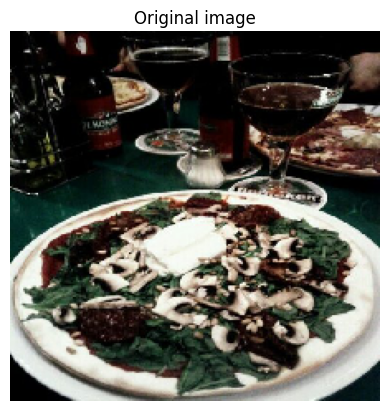

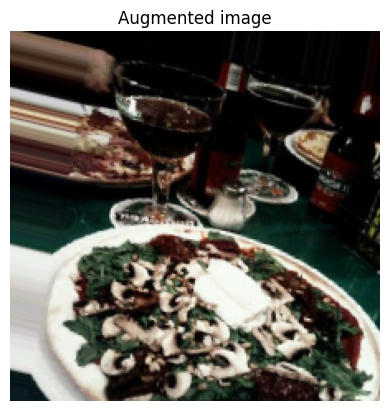

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Here we can see that the augmented images will be helpful in real world scenarios, because the pictures in real world will not always be perfect

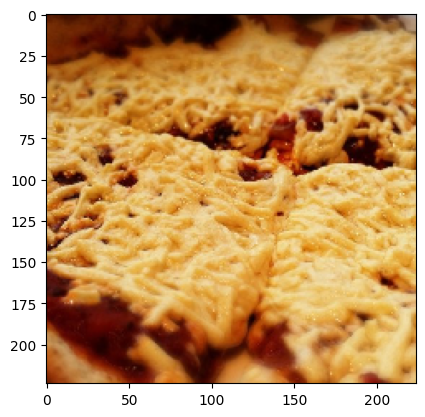

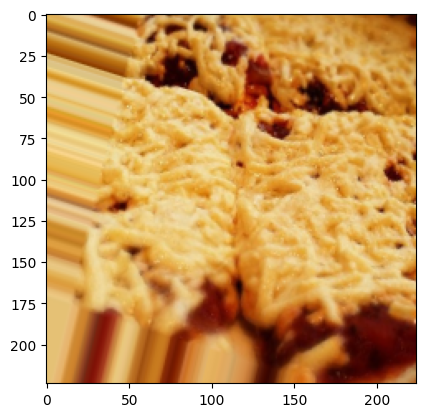

In [ ]:
plt.imshow(images[1])
plt.figure()
plt.imshow(augmented_images[1])

In [ ]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 35s 711ms/step - loss: 0.7174 - accuracy: 0.5033 - val_loss: 0.6807 - val_accuracy: 0.5400
Epoch 2/5
47/47 [==============================] - 29s 616ms/step - loss: 0.6880 - accuracy: 0.5467 - val_loss: 0.6502 - val_accuracy: 0.5620
Epoch 3/5
47/47 [==============================] - 26s 542ms/step - loss: 0.6869 - accuracy: 0.5747 - val_loss: 0.6431 - val_accuracy: 0.5540
Epoch 4/5
47/47 [==============================] - 25s 524ms/step - loss: 0.6530 - accuracy: 0.6173 - val_loss: 0.6158 - val_accuracy: 0.7380
Epoch 5/5
47/47 [==============================] - 25s 531ms/step - loss: 0.6620 - accuracy: 0.6387 - val_loss: 0.5926 - val_accuracy: 0.7560


<Axes: >

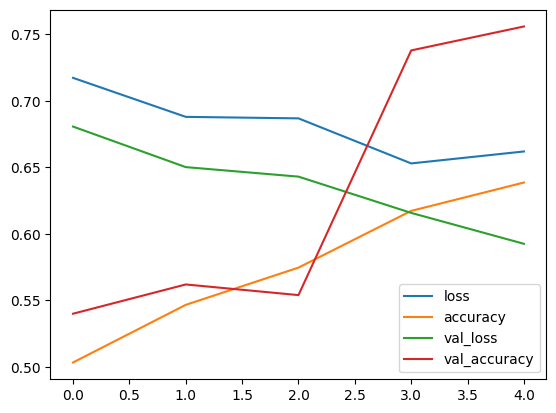

In [ ]:
pd.DataFrame(history_6.history).plot()

The loss curves are not ideal.
Let's see what happens when we shuffle the augmented training data.

In [ ]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 31s 637ms/step - loss: 0.6580 - accuracy: 0.6253 - val_loss: 0.5758 - val_accuracy: 0.6700
Epoch 2/5
47/47 [==============================] - 24s 517ms/step - loss: 0.5655 - accuracy: 0.7113 - val_loss: 0.4319 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 25s 521ms/step - loss: 0.5100 - accuracy: 0.7593 - val_loss: 0.3725 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 24s 520ms/step - loss: 0.4957 - accuracy: 0.7647 - val_loss: 0.3484 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 24s 522ms/step - loss: 0.4831 - accuracy: 0.7760 - val_loss: 0.3338 - val_accuracy: 0.8520


<Axes: >

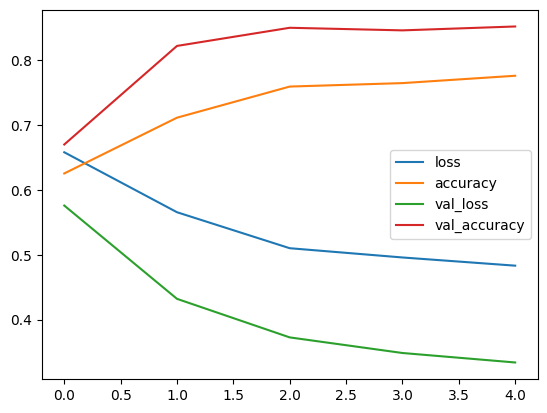

In [ ]:
pd.DataFrame(history_7.history).plot()

####Repeat Until Satisfied

In [ ]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 31s 596ms/step - loss: 0.6651 - accuracy: 0.5780 - val_loss: 0.5515 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 25s 530ms/step - loss: 0.5681 - accuracy: 0.7060 - val_loss: 0.4438 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 25s 531ms/step - loss: 0.5593 - accuracy: 0.7073 - val_loss: 0.4270 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 25s 533ms/step - loss: 0.5177 - accuracy: 0.7460 - val_loss: 0.3894 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 27s 586ms/step - loss: 0.5014 - accuracy: 0.7607 - val_loss: 0.3628 - val_accuracy: 0.8420


<Axes: >

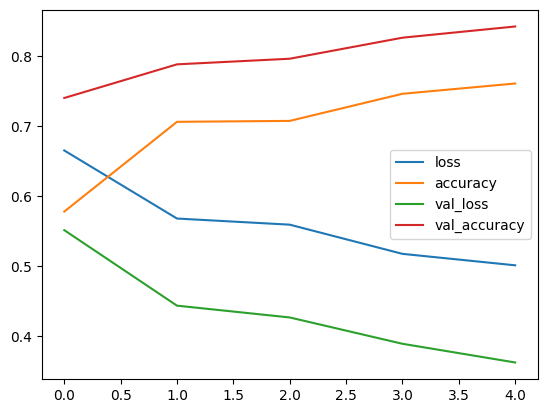

In [ ]:
pd.DataFrame(history_8.history).plot()

There are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use transfer learning to leverage what another image model has learned and adjust it for our own use case.

####Making Prediction on custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-06-16 17:01:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2023-06-16 17:01:02 (168 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



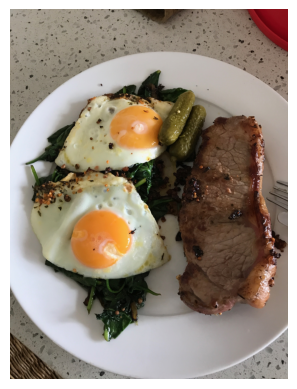

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

We need to preprocess the image as it is not yet compatible with our model.

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")


In [ ]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


In [ ]:
# Make a prediction on custom image tensor
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 325ms/step


array([[0.7049192]], dtype=float32)

It currently outputs prediction probability. Lets try to get the class.

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

IT OUTPUTS STEAK, WHICH IS CORRECT.

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 63ms/step


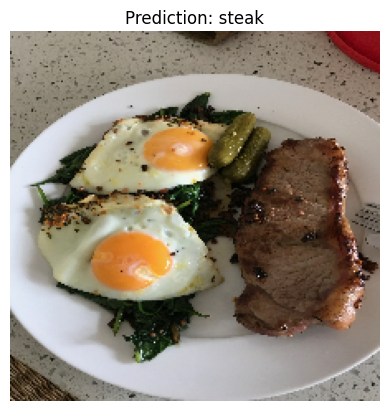

In [ ]:

# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2023-06-16 17:16:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2023-06-16 17:16:52 (59.2 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 206ms/step


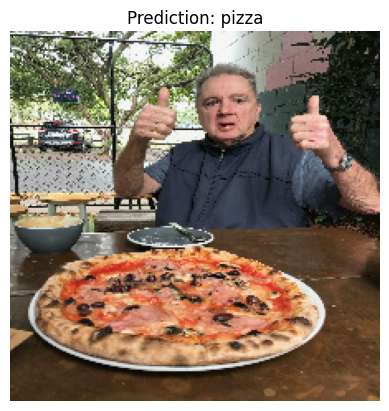

In [ ]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

###Multi-class Classification

1. Import and become one with the data

In [ ]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2023-06-16 17:22:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 172.253.118.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  22.2MB/s    in 23s     

2023-06-16 17:23:03 (21.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


2. Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=True) # changed to categorical

test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


3. Create a model (start with a baseline)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_9 = Sequential([
    Conv2D(10,3,activation='relu',input_shape =(224,224,3)),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(2),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(10,activation='softmax')   # 10 neurons because there are 10 classes.
])

model_9.compile(loss = "categorical_crossentropy",
                optimizer ='adam',
                metrics=["accuracy"]

                )

4. Fit a model

In [ ]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 151s 633ms/step - loss: 2.2526 - accuracy: 0.1517 - val_loss: 2.1173 - val_accuracy: 0.2260
Epoch 2/5
235/235 [==============================] - 131s 557ms/step - loss: 2.0849 - accuracy: 0.2592 - val_loss: 1.9750 - val_accuracy: 0.3040
Epoch 3/5
235/235 [==============================] - 126s 537ms/step - loss: 2.0241 - accuracy: 0.2787 - val_loss: 1.8833 - val_accuracy: 0.3352
Epoch 4/5
235/235 [==============================] - 127s 539ms/step - loss: 1.9860 - accuracy: 0.3004 - val_loss: 1.8258 - val_accuracy: 0.3720
Epoch 5/5
235/235 [==============================] - 123s 523ms/step - loss: 1.9548 - accuracy: 0.3221 - val_loss: 1.8020 - val_accuracy: 0.3904


5. Evaluate the model

In [ ]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 12s 157ms/step - loss: 1.8020 - accuracy: 0.3904


[1.8020267486572266, 0.3903999924659729]

<Axes: >

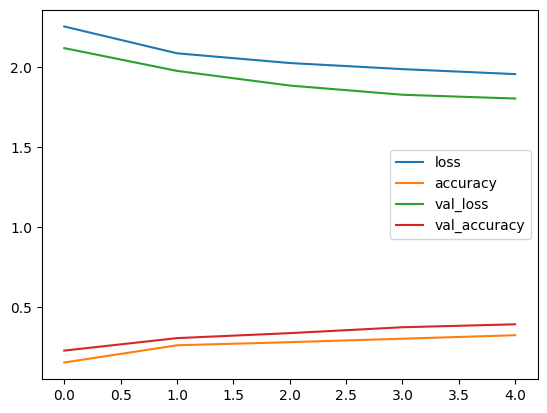

In [ ]:
import pandas as pd
pd.DataFrame(history_9.history).plot()

In [ ]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg


In [ ]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 38ms/step


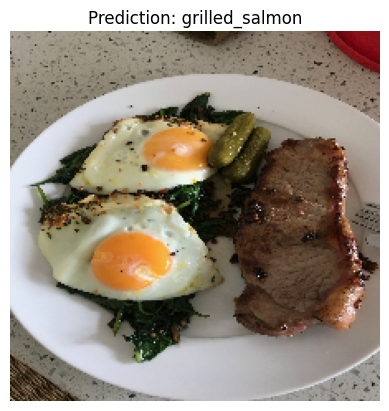

In [ ]:
pred_and_plot(model_9, "03-steak.jpeg", class_names)

-TO IMPROVE THE RESULTS WE WILL HAVE TO USE TRANSFER LEARNING-